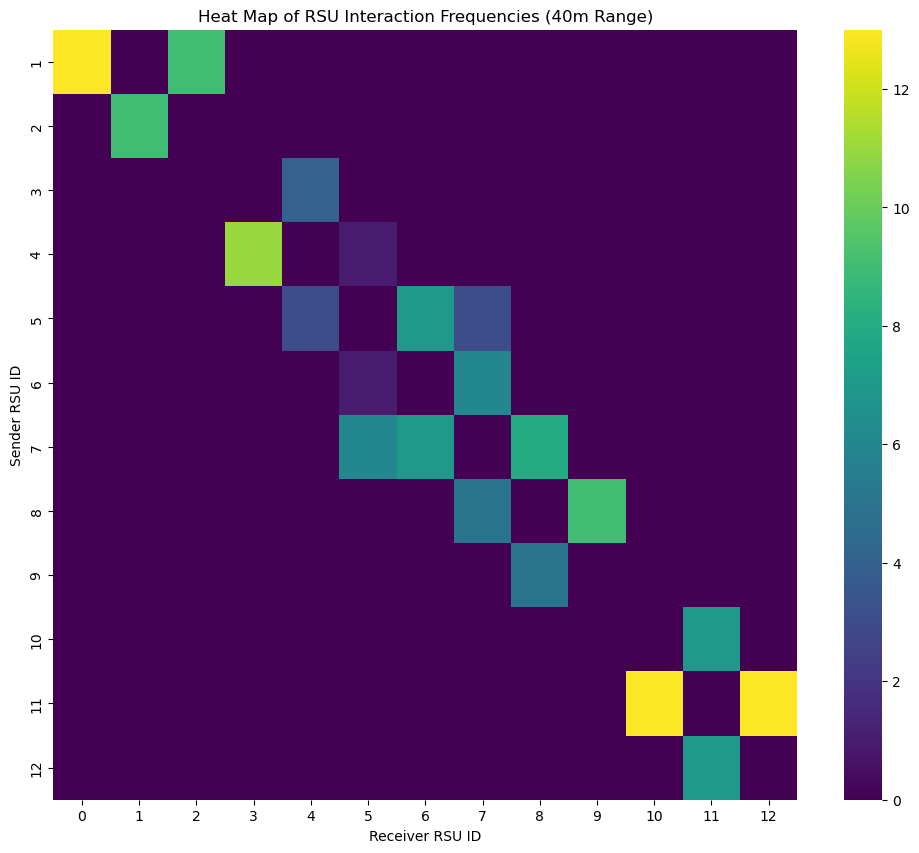

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the new RSU interaction data with 40m range
file_path_new = 'RSU_Interactions.csv'
rsu_data_new = pd.read_csv(file_path_new)

# Creating a pivot table to represent the interaction frequencies between different RSUs (40m range)
interaction_matrix_new = rsu_data_new.pivot_table(index='Sender RSU ID', columns='Receiver RSU ID', aggfunc=len, fill_value=0, values='Send Time')

# Plotting the heat map for the 40m range using Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(interaction_matrix_new, cmap='viridis', annot=False)
plt.title('Heat Map of RSU Interaction Frequencies (40m Range)')
plt.xlabel('Receiver RSU ID')
plt.ylabel('Sender RSU ID')
plt.show()

In [3]:
# Defining a function to create a unique identifier for each pair of interacting RSUs
# This ensures that interactions like 11-12 and 12-11 are treated as the same
def create_interaction_id(row):
    return tuple(sorted([row['Sender RSU ID'], row['Receiver RSU ID']]))

file_path_new = 'RSU_Interactions.csv'

rsu_data = pd.read_csv(file_path_new)

# Applying the function to create a new column representing the interaction ID
rsu_data['Interaction ID'] = rsu_data.apply(create_interaction_id, axis=1)

# Calculating the latency as the difference between "Receive Time" and "Send Time"
rsu_data['Latency'] = rsu_data['Receive Time'] - rsu_data['Send Time']

# Grouping the data by the interaction ID and calculating the average latency
average_latency = rsu_data.groupby('Interaction ID')['Latency'].mean().reset_index()

# Renaming columns for better understanding
average_latency.columns = ['Interaction (RSU1-RSU2)', 'Average Latency']

# Displaying the result
average_latency.head()

,Interaction (RSU1-RSU2),Average Latency
0,"(0.0, 1.0)",0.055479
1,"(1.0, 2.0)",0.055547
2,"(3.0, 4.0)",0.055669
3,"(4.0, 5.0)",0.056495
4,"(5.0, 6.0)",0.055867
